<h2 align='center'>| Driver Drowsiness Detector|</h2>
<h3 align='right'>- by D VAMSIDHAR</h3>

<h2 align='center'>| CodeClause Data Science Internship |</h2>

In [1]:
#importing required libraries 

import os
import random
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import concatenate
from keras.models import Sequential, Model
from keras.preprocessing.image import load_img
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
drowsiness_directory = 'E:/Deep Learning/Driver Drowsiness Detection/Driver Drowsiness Dataset (DDD)/Drowsy'
non_drowsiness_directory = 'E:/Deep Learning/Driver Drowsiness Detection/Driver Drowsiness Dataset (DDD)/Non Drowsy'

In [3]:
#Drowsiness dataframe

image_paths = []
status_paths = []

for filename in tqdm(os.listdir(drowsiness_directory)):
    image_path = os.path.join(drowsiness_directory, filename)
    image_paths.append(image_path)
    status_paths.append('Drowsy')

#creating a dataframe for drowsiness
drowsiness_df = pd.DataFrame()
drowsiness_df['Image'], drowsiness_df['Status'] = image_paths, status_paths
drowsiness_df.head()

drowsiness_df.to_csv('Drowsiness.csv', index=False)

100%|██████████| 22348/22348 [00:00<00:00, 291288.49it/s]


In [4]:
#Non Drowsiness dataframe

image_paths = []
status_paths = []

for filename in tqdm(os.listdir(non_drowsiness_directory)):
    image_path = os.path.join(non_drowsiness_directory, filename)
    image_paths.append(image_path)
    status_paths.append('Non Drowsy')

#creating a dataframe for non drowsiness
non_drowsiness_df = pd.DataFrame()
non_drowsiness_df['Image'], non_drowsiness_df['Status'] = image_paths, status_paths
non_drowsiness_df.head()

non_drowsiness_df.to_csv('Non Drowsiness.csv', index=False)

  0%|          | 0/19445 [00:00<?, ?it/s]

100%|██████████| 19445/19445 [00:00<00:00, 300876.31it/s]


In [5]:
df = pd.concat([drowsiness_df, non_drowsiness_df], ignore_index=True)
df.to_csv('Final Dataset.csv')

In [6]:
# Map 'Non Drowsiness' to 0 and 'Drowsiness' to 1 in the 'Status' column
df['Status'] = df['Status'].map({'Non Drowsy': 0, 'Drowsy': 1})

In [7]:
df.head()

,Image,Status
0,E:/Deep Learning/Driver Drowsiness Detection/D...,1
1,E:/Deep Learning/Driver Drowsiness Detection/D...,1
2,E:/Deep Learning/Driver Drowsiness Detection/D...,1
3,E:/Deep Learning/Driver Drowsiness Detection/D...,1
4,E:/Deep Learning/Driver Drowsiness Detection/D...,1


In [8]:
df.shape

(41793, 2)

In [14]:
df[df['Status']==1].count()

Image     22348
Status    22348
dtype: int64

In [13]:
df[df['Status']==0].count()

Image     19445
Status    19445
dtype: int64

## Exploratory Data Analysis

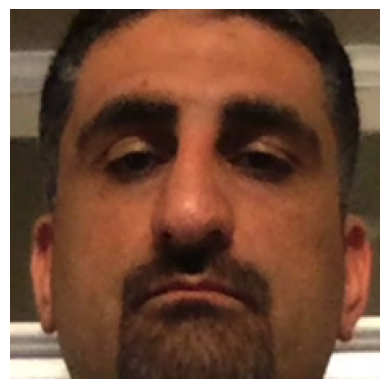

In [10]:
from PIL import Image
img = Image.open(df['Image'][0])
plt.axis('off')
plt.imshow(img)

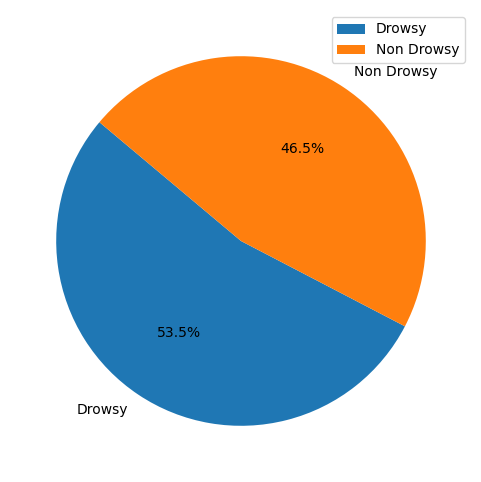

In [17]:
# Pie chart

labels = ['Drowsy','Non Drowsy']
status = [22348, 19445]

plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(status, labels=labels, autopct='%1.1f%%', startangle=140)  # Create the pie chart
plt.legend()

## Feature Extraction

In [19]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128, 128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [20]:
X = extract_features(df['Image'])

100%|██████████| 41793/41793 [06:56<00:00, 100.30it/s]


In [21]:
X.shape

(41793, 128, 128, 1)

In [22]:
# normalize the images
X = X/255.0

In [23]:
Y_status = np.array(df['Status'])

In [24]:
input_shape = (128, 128, 1)

## Model Building

In [25]:
inputs = Input((input_shape))
# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

#fully connected layers

dense_1 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)

output_1 = Dense(1, activation='sigmoid', name='status_out') (dropout_1)

model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [32]:
# plot the model
from keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
# train model
history = model.fit(x=X, y=Y_status, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
1045/1045 [==============================] - 332s 316ms/step - loss: 0.0643 - accuracy: 0.9745 - val_loss: 8.3607 - val_accuracy: 0.1284
Epoch 2/30
1045/1045 [==============================] - 317s 304ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 7.2854 - val_accuracy: 0.1477
Epoch 3/30
1045/1045 [==============================] - 307s 294ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 15.0224 - val_accuracy: 0.0605
Epoch 4/30
1045/1045 [==============================] - 295s 282ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 12.1123 - val_accuracy: 0.0695
Epoch 5/30
1045/1045 [==============================] - 295s 282ms/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 16.4171 - val_accuracy: 0.0574
Epoch 6/30
1045/1045 [==============================] - 286s 273ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 16.1055 - val_accuracy: 0.0635
Epoch 7/30
1045/1045 [==============================] - 1578s 2s/step - loss: 0.0072 - accuracy: 0.9984 - va

## Plot the Results

<Figure size 640x480 with 0 Axes>

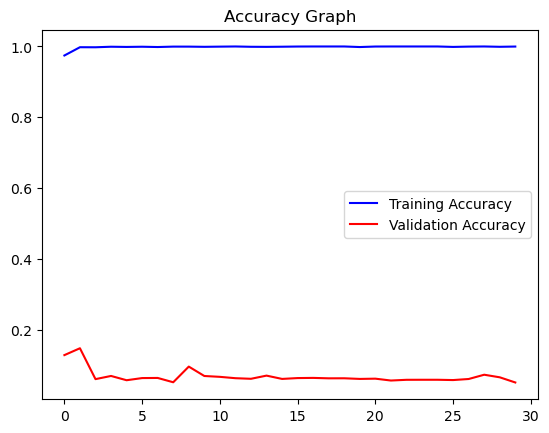

<Figure size 640x480 with 0 Axes>

In [34]:
# plot results for status

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

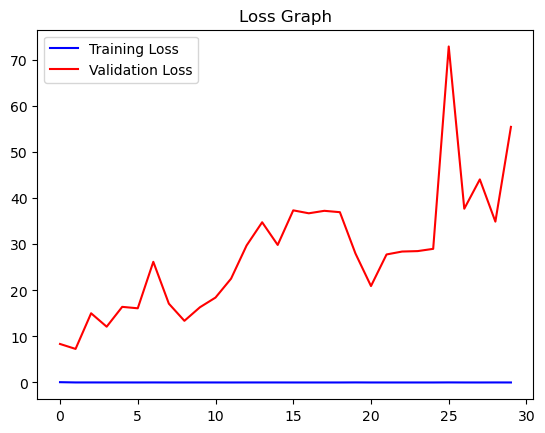

In [35]:
# plot the loss results

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


Original Status :  Drowsy
1/1 [==============================] - 0s 23ms/step
Predicted Status :  Drowsy


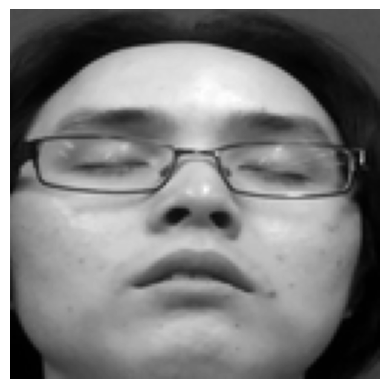

In [64]:

image_index = 9000

#Original Status
if Y_status[image_index] == 1:
    print('Original Status : ', 'Drowsy')
else:
    print('Original Status : ', 'Not Drowsy')

#Prediction 
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_status = pred[0][0]
threshold = 0.5
predicted_class = 1 if pred[0][0] >= threshold else 0

if predicted_class == 1:
    print("Predicted Status : ", 'Drowsy')
else:
    print("Predicted Status : ", 'Not Drowsy')

plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray')

In [48]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856 

In [66]:
model.save('Drowsiness_detector.pb')

INFO:tensorflow:Assets written to: Drowsiness_detector.pb\assets


INFO:tensorflow:Assets written to: Drowsiness_detector.pb\assets
